<a href="https://colab.research.google.com/github/vineethvc/googleColab/blob/main/DalClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd gdrive/MyDrive/Data

/content/gdrive/MyDrive/Data


In [ ]:
PATH = "/content/gdrive/My Drive/Data"

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])

In [ ]:
batch_size = 5
epochs = 50
IMG_HEIGHT = 148
IMG_WIDTH = 148

In [ ]:
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range = 40,
        height_shift_range = 0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_image_generator = ImageDataGenerator(
        rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
        PATH + '/train',
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        PATH + '/validation',
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')

Found 182 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


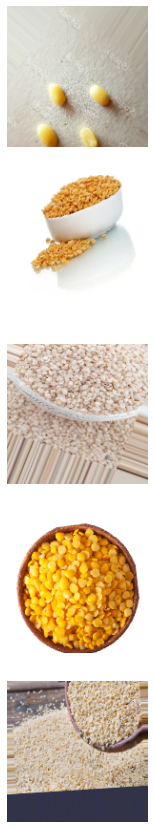

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% urad")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% toor")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Use the model proposed in the paper **Lightweight Deep Convolutional Network for Tiny Object Recognition** by Thanh-Dat Truong, Vinh-Tiep Nguyen and Minh-Triet Tran to detect small objects. [Source](https://www.scitepress.org/papers/2018/67520/67520.pdf)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, SpatialDropout2D as Dropout2D, Flatten, Dense, BatchNormalization, AveragePooling2D

#Placeholder command to reset the model

tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(148, 148,3)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout2D(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout2D(0.3))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout2D(0.4))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout2D(0.5))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))


model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout2D(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(
        train_data_gen,
        epochs=15,
        validation_data=val_data_gen)

Epoch 1/5
37/37 [==============================] - 95s 3s/step - loss: 0.7809 - accuracy: 0.4835 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/5
37/37 [==============================] - 87s 2s/step - loss: 0.7139 - accuracy: 0.5769 - val_loss: 0.6678 - val_accuracy: 0.5333
Epoch 3/5
37/37 [==============================] - 87s 2s/step - loss: 0.6327 - accuracy: 0.6538 - val_loss: 0.6486 - val_accuracy: 0.6667
Epoch 4/5
37/37 [==============================] - 87s 2s/step - loss: 0.6808 - accuracy: 0.6648 - val_loss: 0.6156 - val_accuracy: 0.7000
Epoch 5/5
37/37 [==============================] - 87s 2s/step - loss: 0.5813 - accuracy: 0.7473 - val_loss: 0.4603 - val_accuracy: 0.8667


Run a test on suite of unlabeled images to test for the model's performance

In [ ]:
test_image_generator = ImageDataGenerator(
        rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
        PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        shuffle=False,
        classes=['test'])

Found 10 images belonging to 1 classes.


[[0.30116135]
 [0.48070878]
 [0.19632119]
 [0.7078078 ]
 [0.20441645]
 [0.7429851 ]
 [0.28360564]
 [0.7014718 ]
 [0.37538567]
 [0.61952436]]


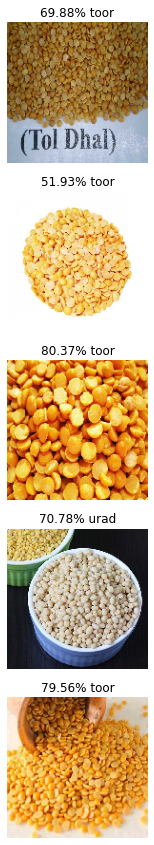

In [ ]:
#model = reconstructed_model
probabilities = model.predict(test_data_gen)
print(probabilities)
sample_training_images, _ = next(test_data_gen)
plotImages(sample_training_images[:15],probabilities)

Save the trained model using TensorFlow.JS, an interface provided by TensorFlow to train machine learning models directly in the browser or infer from trained machine learning models.

In [ ]:
model.save(PATH+"/test")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Data/test/assets


In [ ]:
import keras

PATH = "/content/gdrive/My Drive/Data"
reconstructed_model = keras.models.load_model(PATH+"/test")

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(reconstructed_model,PATH+'/SavedModel1')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
